In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[Reference Link](https://www.kaggle.com/datasets/matheusfonsecachaves/popular-video-games)

**Objectives**
1. ศึกษาพฤติกรรมการเล่นเกมของผู้เล่นในแพลทฟอร์ม Steam
   - Heatmap สำหรับแต่ละคู่ของข้อมูล
2. วิเคราะห์หมวดหมู่เกมที่ได้รับความนิยมในยุคปัจจุบัน
    - หมวดหมู่เกมที่นิยมวางขายในปี 2023
    - หมวดหมู่เกมที่มีเรตติ้งมากกว่า 4.5 เรียงตาม Plays



In [5]:
df = pd.read_csv('backloggd_games.csv')
# Remove duplicates
df.drop_duplicates(subset=["Title"],inplace=True)

df.replace('?', np.nan, inplace=True)
df.replace('NaN', np.nan, inplace=True)
df.dropna(inplace=True)
df

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,59972,Planet Crafter,"Mar 24, 2022",['Miju Games'],You are sent on an hostile planet with one mis...,['Windows PC'],"['Adventure', 'Simulator']",3.8,50,9,22,37,14,3
59973,59973,FIFA Manager 14,"Oct 24, 2013","['Bright Future', 'Electronic Arts']",FIFA Manager 14: Legacy Edition is a re-releas...,['Windows PC'],['Sport'],2.5,6,0,4,0,1,0
59978,59978,Super Widget,"Feb 01, 1993",[],Planet Earth is in danger from assorted villai...,['SNES'],['Platform'],2.7,23,0,4,3,10,0
59981,59981,Pizza Delivery Boy,"Apr 18, 2010",[],When three brothers mismanage their successful...,['Wii'],['Puzzle'],0.7,3,0,0,1,1,0


In [18]:
def kUnitToNumber(text):
    if type(text) != str:
        return text
    if text[-1].lower() == 'k':
        return int(float(text[:-1]) * 1000)
    else:
        return int(float(text))
    
df["Plays"] = df["Plays"].apply(kUnitToNumber)
df["Playing"] = df["Playing"].apply(kUnitToNumber)
df["Backlogs"] = df["Backlogs"].apply(kUnitToNumber)
df["Wishlist"] = df["Wishlist"].apply(kUnitToNumber)
df["Lists"] = df["Lists"].apply(kUnitToNumber)
df["Reviews"] = df["Reviews"].apply(kUnitToNumber)

In [19]:
backup_df = df.copy()

In [20]:
def getReleaseYear(releaseDate):
    if releaseDate == "TBD":
        return 2024
    return int(releaseDate.split(',')[1])

df["Release Year"] = df["Release_Date"].apply(getReleaseYear)

In [21]:
df['Genres'] = df['Genres'].str.strip('[]').str.split(', ')
df['Genres'] = df['Genres'].apply(lambda row: [i for i in row if i])
pop_genres_df = df.explode('Genres')

In [26]:
df_numerical = df[["Rating","Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews","Release Year"]]
df_numerical.head()

,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release Year
0,4.5,21000,4100,5600,5500,4600,3000,2022
1,4.4,35000,3100,5600,3000,5100,3000,2017
2,4.3,25000,3500,7300,4000,3200,2100,2018
3,4.4,25000,2700,9600,2600,3400,2100,2017
4,4.2,32000,728,5700,2100,3900,2500,2015


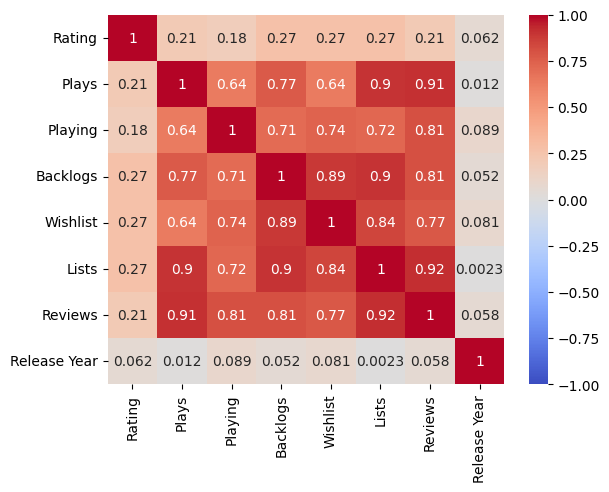

In [27]:
correlation = df_numerical.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

<Axes: ylabel='Genres'>

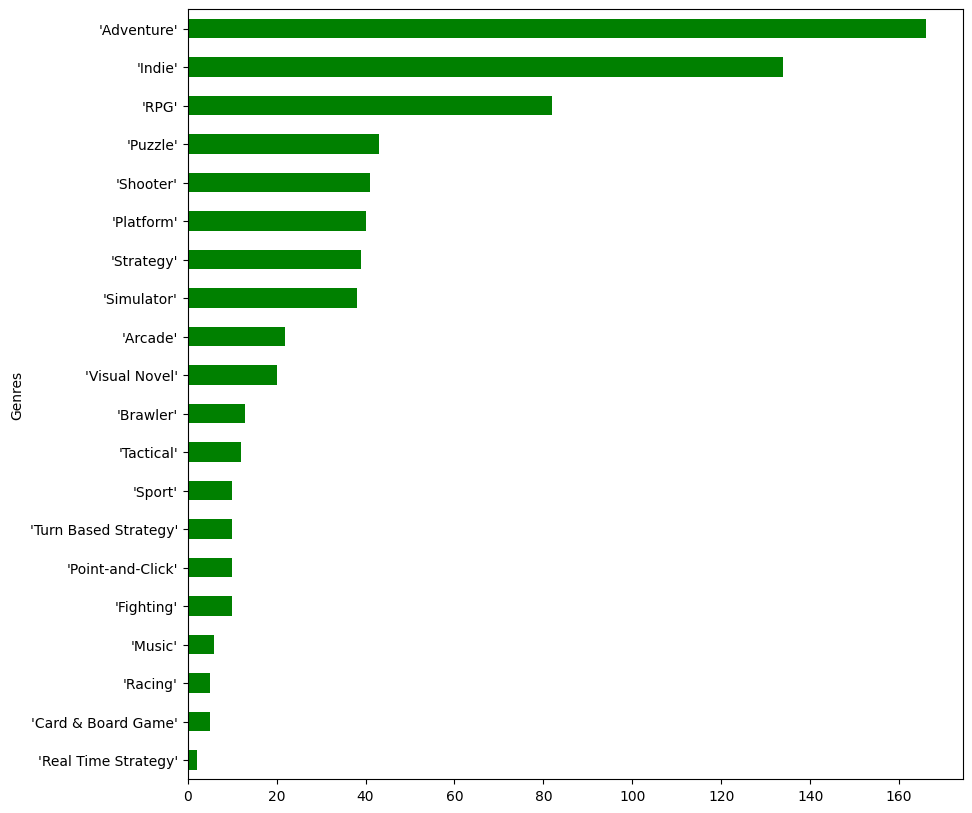

In [28]:
df_2023 = pop_genres_df[pop_genres_df["Release Year"] == 2023]
countByGenres = df_2023.groupby("Genres")["Rating"].count()
countByGenres.sort_values(ascending=True, inplace=True)

# plot bar chart horizontal
countByGenres.plot(kind="barh", figsize=(10, 10), color="green")

In [35]:
df_highRate = df[df['Rating'] >= 4.5]
df_highRate = df_highRate.sort_values(by='Plays', ascending=False)
df_highRate
# countByGenres = df_2023.groupby("Genres")["Rating"].count()
# countByGenres.sort_values(ascending=True, inplace=True)

# # plot bar chart horizontal
# countByGenres.plot(kind="barh", figsize=(10, 10), color="green")

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release Year
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4100,5600,5500,4600,3000,2022
17,17,Bloodborne,"Mar 24, 2015","['FromSoftware', 'Sony Computer Entertainment']",An action RPG in which the player embodies a H...,['PlayStation 4'],"['Adventure', 'RPG']",4.5,20000,1200,6500,3800,3800,1600,2015
79,79,Chrono Trigger,"Mar 11, 1995",['Square'],"In this turn-based Japanese RPG, young Crono m...","['PlayStation 3', 'Super Famicom', 'SNES', 'Wi...","['Adventure', 'RPG']",4.5,10000,569,5500,2400,2200,520,1995
143,143,Metal Gear Solid 3: Snake Eater,"Nov 17, 2004","['Konami Computer Entertainment Japan', 'Konami']",Metal Gear Solid 3: Snake Eater is the prequel...,['PlayStation 2'],"['Adventure', 'Shooter', 'Tactical']",4.5,10000,147,2800,1500,1800,533,2004
49,49,Silent Hill 2,"Sep 24, 2001","['Konami', 'Team Silent']","The second entry in the Silent Hill franchise,...",['PlayStation 2'],"['Adventure', 'Puzzle']",4.5,9900,342,3400,2400,2600,841,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,25748,Phantasmat: Collector's Edition,"Feb 08, 2011",[],After crashing your car in the middle of nowhe...,['Windows PC'],['Puzzle'],4.8,3,0,0,2,5,0,2011
47660,47660,Mordor: The Depths of Dejenol,"Dec 31, 1995",['MakeItSo Software'],Mordor: The Depths of Dejenol is a first-perso...,['Windows PC'],['RPG'],4.7,3,0,3,2,2,0,1995
48411,48411,Summer's Gone: Season 1,"Jun 02, 2020",['Oceanlab'],Summer's Gone is a story-focused Visual Novel ...,"['Windows PC', 'Android', 'Mac']","['Indie', 'Visual Novel']",4.8,3,0,1,0,0,0,2020
4413,4413,Robocop: Rogue City,"Sep 01, 2023","['Nacon', 'Teyon']","Become the iconic part man, part machine, all ...","['Windows PC', 'PlayStation 5', 'Nintendo Swit...","['Adventure', 'Shooter']",5.0,2,0,24,145,44,3,2023


In [ ]:
backlog_play_ratio_df = backup_df.copy()
backlog_play_ratio_df["bp_ratio"] = backup_df["Backlogs"]/backup_df["Plays"]
backlog_play_ratio_df = backlog_play_ratio_df[backlog_play_ratio_df["bp_ratio"] >= 1]
backlog_play_ratio_df = backlog_play_ratio_df.sort_values(by="bp_ratio", ascending=False)
backlog_play_ratio_df

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,bp_ratio
3928,3928,Ys X: Nordics,"Sep 28, 2023",['Nihon Falcom'],Ys X: Nordics is a brand-new adventure set in ...,"['PlayStation 4', 'PlayStation 5', 'Nintendo S...","['Adventure', 'RPG']",5.0,3,0,84,184,37,5,28.000000
1310,1310,Silent Hill f,TBD,['Konami'],Silent Hill f is an upcoming game with a compl...,[],[],2.0,9,0,237,704,102,12,26.333333
1450,1450,Pragmata,TBD,['Capcom'],Pragmata is an action adventure title that dep...,"['Windows PC', 'PlayStation 5', 'Xbox Series']",['Adventure'],3.4,5,1,83,539,120,1,16.600000
1466,1466,Elden Ring: Shadow of the Erdtree,TBD,"['FromSoftware', 'Bandai Namco Entertainment']",An expansion to Elden Ring setting players on ...,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.8,11,1,155,353,46,4,14.090909
7414,7414,Metroid Prime 4,TBD,"['Retro Studios', 'Nintendo']",Developed by a new team under Nintendo produce...,['Nintendo Switch'],['Shooter'],4.8,14,0,196,898,128,7,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,9798,Insecticide Part 1,"Jul 01, 2008","['Missing Link Games', 'Crackpot Entertainment']",Enter the fast shooting world of Insecticide a...,['Windows PC'],"['Adventure', 'Puzzle', 'Shooter']",2.9,12,0,12,2,7,3,1.000000
38647,38647,Sokko Seitokai: Sonic Council,"Jan 29, 1998","['Banpresto Co., Ltd.']",Exclusive Fighting Game on Sega Saturn.,['Sega Saturn'],['Fighting'],3.8,3,0,3,7,6,1,1.000000
26848,26848,Dropship: United Peace Force,"Jul 11, 2002","['BAM! Entertainment', 'Sony Computer Entertai...",Dropship is an action game set in the year 205...,['PlayStation 2'],['Simulator'],2.2,8,0,8,2,5,0,1.000000
32772,32772,EVE: Burst Error R,"Apr 28, 2016","['RED FLAG SHIP', 'El Dia']",A Bizarre Serial Murder Mystery. There's A Ser...,"['Windows PC', 'PlayStation Vita', 'Nintendo S...","['Adventure', 'Visual Novel']",3.4,7,0,7,9,3,1,1.000000
